In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#### Load the Dataset

In [2]:
path = 'C:\\Users\\lenovo\\Desktop\\ML\\emails.csv'
emails_df = pd.read_csv(path)

#### Display the first few rows of the Dataset

In [3]:
emails_df.head(), emails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


(  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
 0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
 1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
 2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
 3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
 4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   
 
    valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
 0       0    0               0         0         0   0    0           0  
 1       0    0               0         0         0   1    0           0  
 2       0    0               0         0         0   0    0           0  
 3       0    0               0         0         0   0    0           0  
 4       0    0               0         0         0   1    0           0  
 
 [5 rows x 3002 columns],
 None)

#### Separate features and labels.

In [4]:
X = emails_df.drop(columns=['Email No.', 'Prediction'])  # Features (word counts)
y = emails_df['Prediction']  # Labels (spam or not spam)

#### Split the dataset into training and testing sets (80% train, 20% test)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4137, 3000), (1035, 3000), (4137,), (1035,))

#### Initialize KNN classifier

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)  # Train the classifier
y_pred_knn = knn.predict(X_test)  # Predict on the test set
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=['Not Spam', 'Spam'])
print(f"KNN Classifier Accuracy: {accuracy_knn:.2f}")
print("KNN Classification Report:")
print(report_knn)

KNN Classifier Accuracy: 0.87
KNN Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.93      0.88      0.91       735
        Spam       0.74      0.85      0.79       300

    accuracy                           0.87      1035
   macro avg       0.84      0.86      0.85      1035
weighted avg       0.88      0.87      0.87      1035



#### Train the classifier

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Predict on the test set

In [8]:
y_pred_knn = knn.predict(X_test)

#### Evaluate the performance

In [9]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=['Not Spam', 'Spam'])
accuracy_knn, report_knn

(0.8714975845410629,
 '              precision    recall  f1-score   support\n\n    Not Spam       0.93      0.88      0.91       735\n        Spam       0.74      0.85      0.79       300\n\n    accuracy                           0.87      1035\n   macro avg       0.84      0.86      0.85      1035\nweighted avg       0.88      0.87      0.87      1035\n')

#### Initialize SVM classifier with a linear kernel

In [10]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)  # Train the classifier
y_pred_svm = svm.predict(X_test)  # Predict on the test set
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, target_names=['Not Spam', 'Spam'])
print(f"SVM Classifier Accuracy: {accuracy_svm:.2f}")
print("SVM Classification Report:")
print(report_svm)

SVM Classifier Accuracy: 0.97
SVM Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.98      0.97      0.98       735
        Spam       0.94      0.95      0.94       300

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



#### Function to plot confusion matrix

In [11]:
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#### KNN Confusion Matrix

Confusion Matrix for KNN:


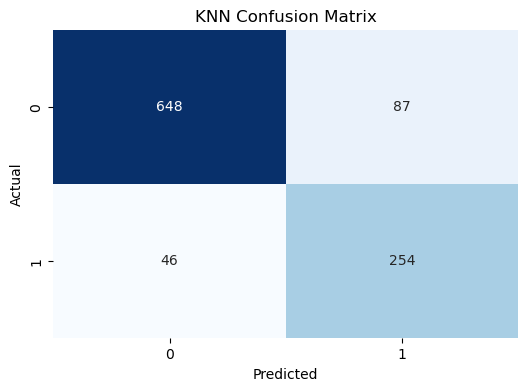

In [12]:
print("Confusion Matrix for KNN:")
plot_confusion_matrix(y_test, y_pred_knn, "KNN Confusion Matrix")

#### SVM Confusion Matrix

Confusion Matrix for SVM:


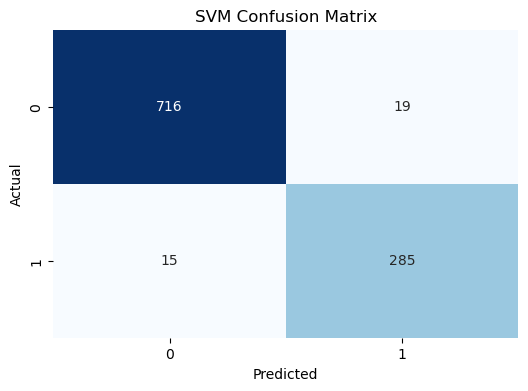

In [13]:
print("Confusion Matrix for SVM:")
plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")